# German Credit Risk with Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1.โหลด csv เข้าไปใน Python Pandas

In [2]:
df = pd.read_csv('german_credit_data.csv')

## 2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [3]:
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [4]:
df.tail(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
990,990,37,male,1,own,NaN,NaN,3565,12,education,good
991,991,34,male,1,own,moderate,NaN,1569,15,radio/TV,good
992,992,23,male,1,rent,NaN,little,1936,18,radio/TV,good
993,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
994,994,50,male,2,own,NaN,NaN,2390,12,car,good
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [5]:
df.sample(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
69,69,25,female,2,own,NaN,NaN,2394,36,radio/TV,good
465,465,63,male,2,own,little,little,2924,24,car,good
832,832,29,male,2,rent,little,little,11816,45,business,bad
589,589,60,male,2,own,little,little,2246,12,furniture/equipment,bad
90,90,56,male,2,own,little,NaN,618,12,radio/TV,good
453,453,35,male,3,own,little,NaN,2670,24,car,good
967,967,54,female,3,rent,little,NaN,3568,15,radio/TV,good
362,362,36,female,2,own,little,rich,2247,12,car,good
193,193,29,male,2,rent,little,NaN,2108,6,radio/TV,good
781,781,60,male,2,own,rich,NaN,1940,24,car,good


## 3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม

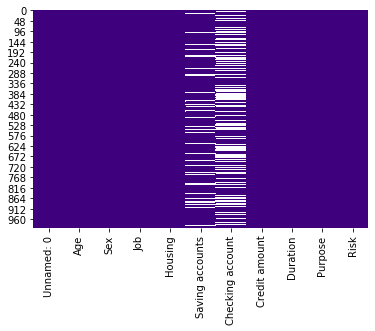

In [6]:
sns.heatmap(df.isnull(), cmap='Purples_r', cbar=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [9]:
df[df['Saving accounts'].isnull()].describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,183.000000,183.000000,183.000000,183.000000,183.000000
mean,513.874317,37.415301,1.945355,3906.409836,22.715847
std,296.796376,11.339525,0.652356,3127.705890,12.863020
min,0.000000,20.000000,0.000000,368.000000,4.000000
25%,269.500000,29.000000,2.000000,1434.000000,12.000000
50%,534.000000,36.000000,2.000000,2859.000000,21.000000
75%,789.000000,44.000000,2.000000,5617.000000,30.000000
max,994.000000,75.000000,3.000000,14555.000000,60.000000


In [10]:
df[df['Saving accounts'].notnull()].describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,817.000000,817.000000,817.000000,817.000000,817.00000
mean,496.280294,35.127295,1.894737,3128.990208,20.49694
std,287.089299,11.348251,0.653935,2731.688353,11.84149
min,1.000000,19.000000,0.000000,250.000000,4.00000
25%,246.000000,26.000000,2.000000,1355.000000,12.00000
50%,496.000000,32.000000,2.000000,2241.000000,18.00000
75%,737.000000,41.000000,2.000000,3850.000000,24.00000
max,999.000000,75.000000,3.000000,18424.000000,72.00000


In [11]:
# สร้าง DataFrame ใหม่ แล้วแทนที่ null ด้วยของ Saving accounts และ Checking account ด้วย 'empty'
df1 = df.copy()

In [12]:
df1['Saving accounts'].fillna(value='empty', inplace=True)

In [13]:
df[df['Checking account'].isnull()].describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,394.000000,394.000000,394.000000,394.000000,394.000000
mean,509.304569,36.426396,1.946701,3133.101523,19.954315
std,286.968987,10.839374,0.588007,2554.164338,11.310917
min,2.000000,19.000000,0.000000,250.000000,4.000000
25%,263.250000,28.000000,2.000000,1414.250000,12.000000
50%,501.000000,34.500000,2.000000,2248.000000,18.000000
75%,766.250000,43.000000,2.000000,3804.000000,24.000000
max,997.000000,74.000000,3.000000,15653.000000,60.000000


In [14]:
df[df['Checking account'].notnull()].describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,606.000000,606.000000,606.000000,606.000000,606.000000
mean,493.125413,34.973597,1.876238,3361.082508,21.519802
std,290.074737,11.684105,0.692006,2983.045726,12.491667
min,0.000000,19.000000,0.000000,276.000000,4.000000
25%,237.500000,26.000000,2.000000,1331.500000,12.000000
50%,499.500000,32.000000,2.000000,2342.500000,18.000000
75%,739.750000,41.000000,2.000000,4096.750000,26.750000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [15]:
df1['Checking account'].fillna(value='empty', inplace=True)

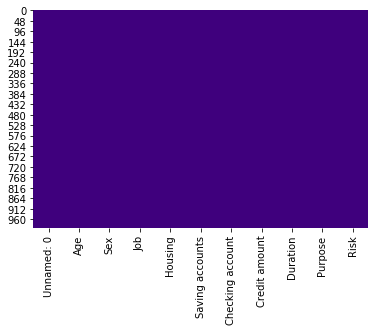

In [16]:
sns.heatmap(df1.isnull(), cmap='Purples_r', cbar=False)

## 4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [18]:
# drop คอลัมน์ Unnamed: 0
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [20]:
df1.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [21]:
# check Job Column
df1['Job'].unique()

array([2, 1, 3, 0])

In [22]:
# Numerical column list
num_cols = [x for x in df1.columns.values if df1[x].dtype != 'O']
num_cols.remove('Job')
num_cols

['Age', 'Credit amount', 'Duration']

In [23]:
# Categorical columns
df1['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [24]:
df1['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [25]:
df1['Saving accounts'].value_counts()

little        603
empty         183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [26]:
df1['Checking account'].value_counts()

empty       394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [27]:
df1['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

In [28]:
df1['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [29]:
# Categorical column list
cat_cols = [x for x in df1.columns.values if df1[x].dtype == 'O']
cat_cols

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

In [30]:
# get dummy variables
df1_new = df1.copy()
dummies = pd.DataFrame()

for col in cat_cols :
    dummy = pd.get_dummies(df1_new[col], drop_first=True, prefix=col)
    dummies = pd.concat([dummies, dummy], axis=1)

dummies

,Sex_male,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
996,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
997,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
998,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [31]:
# drop the categorical columns
for col in cat_cols :
    df1_new = df1_new.drop([col], axis=1)
df1_new

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24
...,...,...,...,...
995,31,1,1736,12
996,40,3,3857,30
997,38,2,804,12
998,23,2,1845,45


In [32]:
# concatenate the dummy variables to the data frame
df1_new = pd.concat([df1_new, dummies], axis=1)
df1_new

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,67,2,1169,6,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,22,2,5951,48,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,49,1,2096,12,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,45,2,7882,42,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,53,2,4870,24,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
996,40,3,3857,30,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
997,38,2,804,12,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
998,23,2,1845,45,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## 5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้นของ features ที่สนใจ

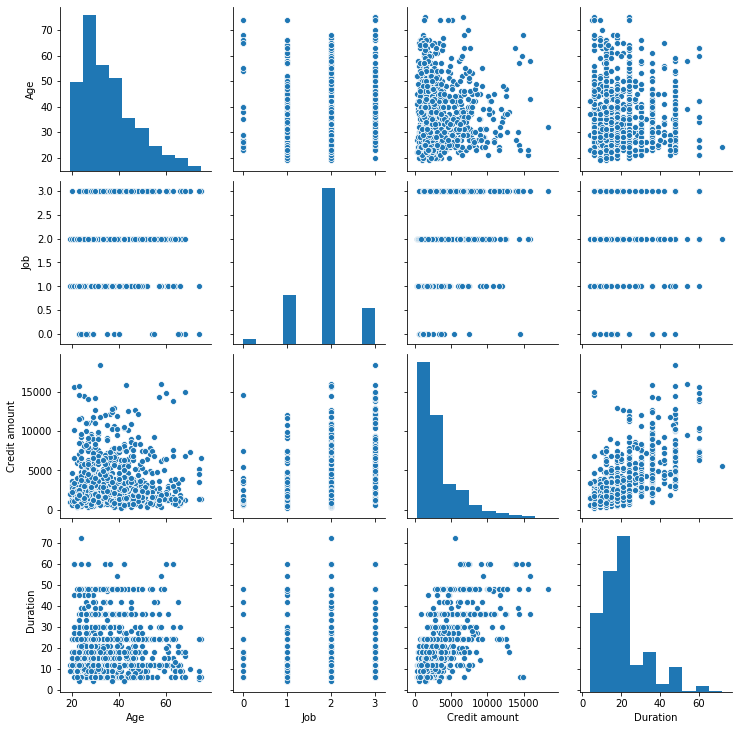

In [33]:
sns.pairplot(df1)

## 6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์

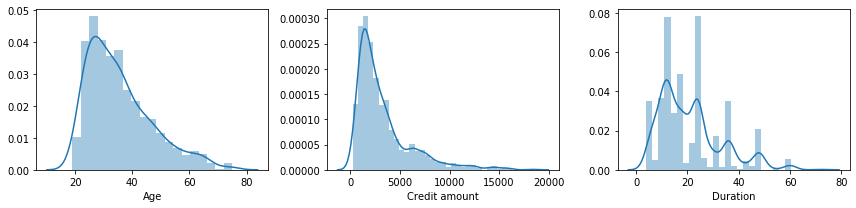

In [34]:
fig = plt.figure(figsize=(12,3))
i = 1
for col in num_cols:
    plt.subplot(1,3,i)
    sns.distplot(df1[col])
    i+=1
fig.tight_layout()

Note :  
* distribution ของ features มี skewness

## 7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ

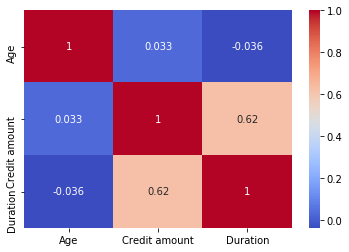

In [35]:
sns.heatmap(df1[num_cols].corr(), cmap='coolwarm', annot=True)

## 8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด

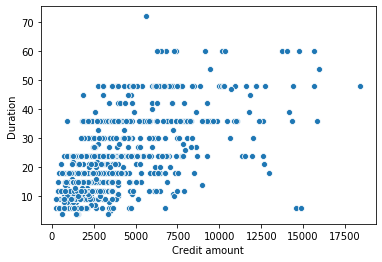

In [36]:
# most correlated pair : Credit amount and Duration
sns.scatterplot(data=df1, x='Credit amount', y='Duration')

## 9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

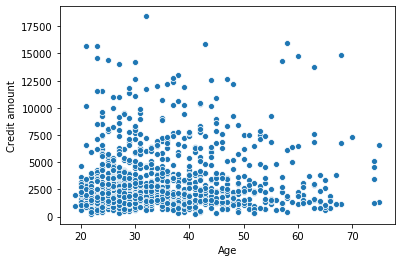

In [37]:
# least correlated pair : Credit amount and Age
sns.scatterplot(data=df1, x='Age', y='Credit amount')

## 10. สร้าง histogram ของ feature ที่สนใจ

(array([445., 293.,  97.,  80.,  38.,  19.,  14.,   8.,   5.,   1.]),
 array([  250. ,  2067.4,  3884.8,  5702.2,  7519.6,  9337. , 11154.4,
        12971.8, 14789.2, 16606.6, 18424. ]),
 <a list of 10 Patch objects>)

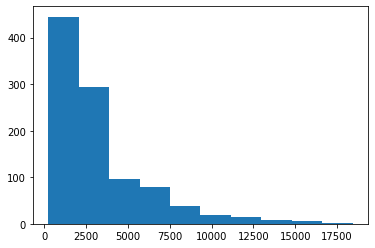

In [38]:
plt.hist(df1['Credit amount'])

Note :  
* Credit amount ที่ไม่เกิน 2000 มีมากที่สุด

(array([171., 262., 337.,  57.,  86.,  17.,  54.,   2.,  13.,   1.]),
 array([ 4. , 10.8, 17.6, 24.4, 31.2, 38. , 44.8, 51.6, 58.4, 65.2, 72. ]),
 <a list of 10 Patch objects>)

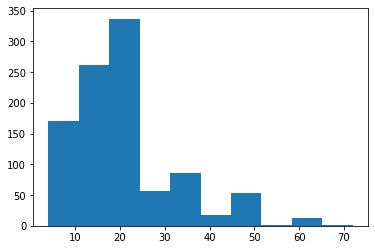

In [39]:
plt.hist(df1['Duration'])

Note :  
* ส่วนมาก ระยะเวลาในการชำระหนี้ อยู่ที่ 4 เดือน ถึง 2 ปี

## 11. สร้าง box plot ของ features ที่สนใจ

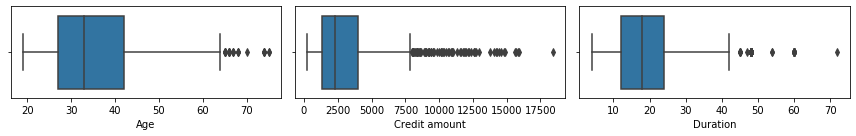

In [40]:
fig = plt.figure(figsize=(12,2))
i = 1
for col in num_cols:
    plt.subplot(1,3,i)
    sns.boxplot(df1[col])
    i+=1
fig.tight_layout()

Note :  
* Credit amount มี outliers จำนวนเยอะมาก
* โมเดล Decision Tree ไม่ sensitive กับ Outliers

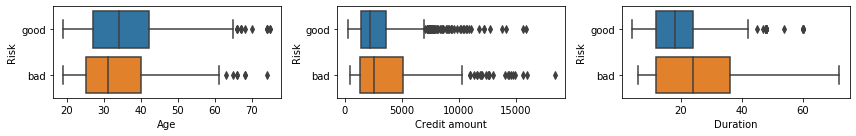

In [41]:
# box plot ของ features แบ่งตาม Risk
fig = plt.figure(figsize=(12,2))
i = 1
for col in num_cols:
    plt.subplot(1,3,i)
    sns.boxplot(x=df1[col], y=df1['Risk'])
    i+=1
fig.tight_layout()

Note :  
* distribution ของอายุ ของแต่ละกลุ่มความเสี่ยง ไม่แตกต่างกันมากนัก
* Credit amount และ Duration ยิ่งมาก ยิ่งมีโอกาสเสี่ยงมากขึ้น

## 13. ทำ Data Visualization อื่นๆ (แล้วแต่เลือก)

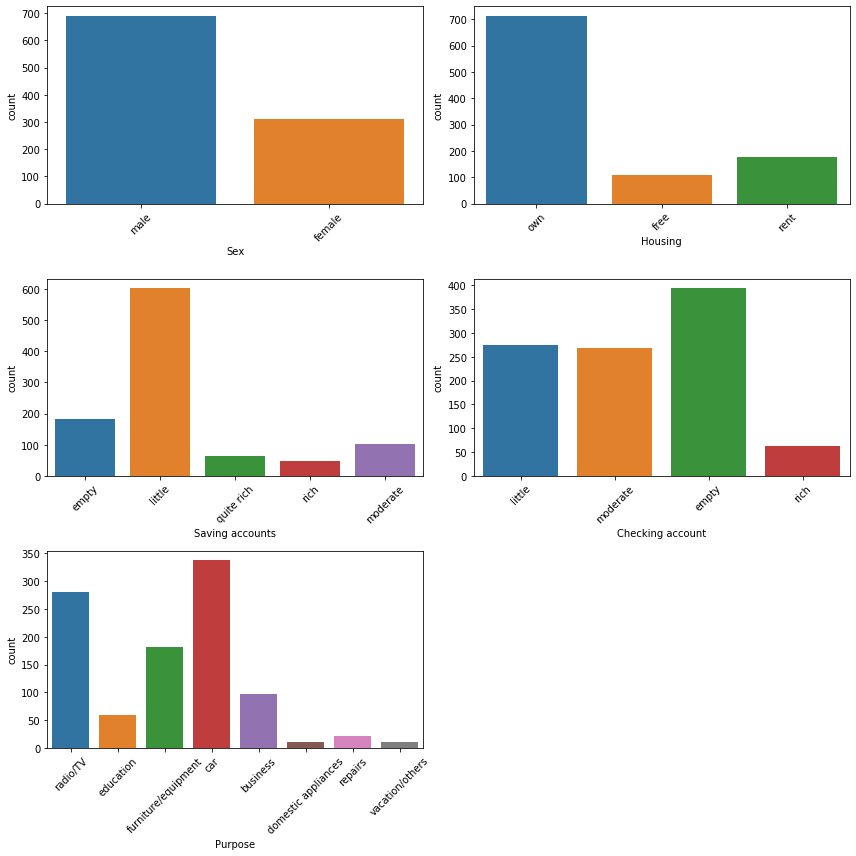

In [42]:
fig = plt.figure(figsize=(12, 12))
i = 1

for col in cat_cols :
    if col != 'Risk' :
        plt.subplot(3, 2, i)
        sns.countplot(x=df1[col])
        plt.xticks(rotation=45)
        i += 1
fig.tight_layout()

Note :  
ส่วนมาก ผู้ที่ทำการกู้ยืม จะเป็น
* เพศชาย
* มีบ้านของตัวเอง
* saving account : little

3 อันดับของวัตถุประสงค์การกู้ยืม ได้แก่
1. car
2. radio/TV
3. furniture/equipment


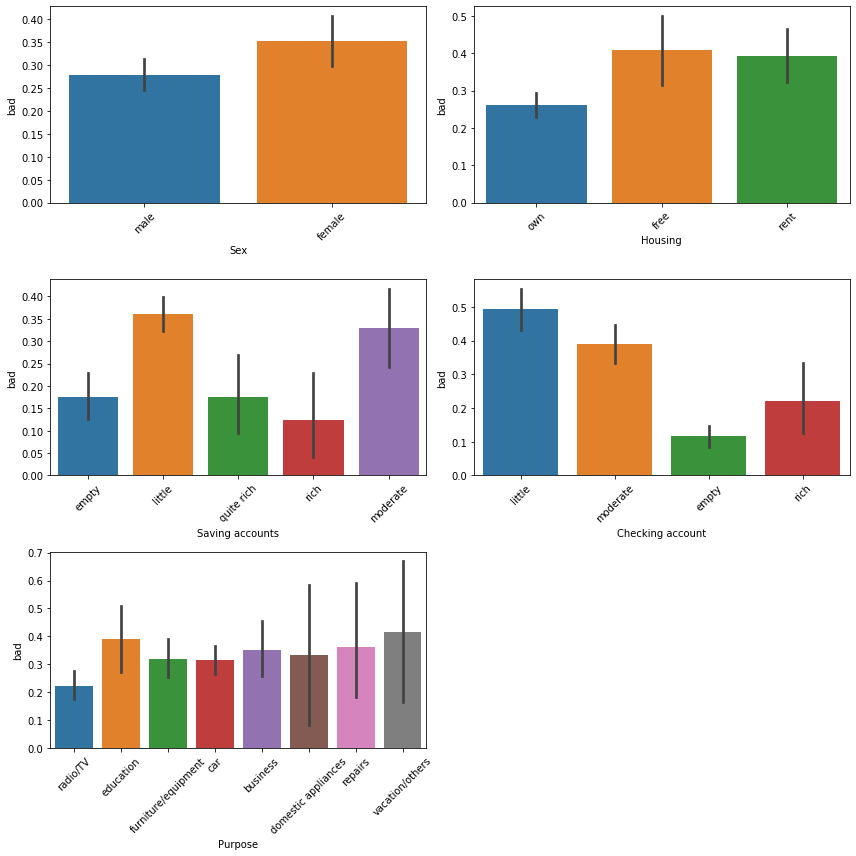

In [43]:
# percentage of bad risk
fig = plt.figure(figsize=(12,12))
i = 1
for col in cat_cols :
    if col != 'Risk':
        plt.subplot(3, 2, i)
        sns.barplot(x=df1[col], y=pd.get_dummies(df['Risk'])['bad'])
        plt.xticks(rotation=45)
        i += 1
fig.tight_layout()

Note :  
* จำนวนผู้ชายที่กู้ยืมเยอะกว่า แต่โอกาสจะเป็น bad risk มีน้อยกว่าผู้หญิง
* จำนวนคนกู้ยืมที่มีบ้านของตัวเอง (own) มีเยอะกว่า แต่โอกาสจะเป็น bad risk มีน้อยกว่า คนที่อยู่ฟรี หรือจ่ายค่าเช่า
* คนที่มี saving account สถานะ little มีจำนวนเยอะกว่า และมีโอกาสเป็น bad risk มากกว่าสถานะอื่นๆ
* คนที่ไม่ระบุ checking account (empty) มีจำนวนเยอะกว่าสถานะอื่น แต่ก็มีโอกาสเป็น bad risk น้อยกว่าสถานะอื่นมาก

## 12. สร้าง train/test split ของข้อมูล สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจ

In [44]:
# check the data frame again
df1_new

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,67,2,1169,6,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,22,2,5951,48,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,49,1,2096,12,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,45,2,7882,42,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,53,2,4870,24,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
996,40,3,3857,30,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
997,38,2,804,12,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
998,23,2,1845,45,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Credit amount                1000 non-null   int64
 3   Duration                     1000 non-null   int64
 4   Sex_male                     1000 non-null   uint8
 5   Housing_own                  1000 non-null   uint8
 6   Housing_rent                 1000 non-null   uint8
 7   Saving accounts_little       1000 non-null   uint8
 8   Saving accounts_moderate     1000 non-null   uint8
 9   Saving accounts_quite rich   1000 non-null   uint8
 10  Saving accounts_rich         1000 non-null   uint8
 11  Checking account_little      1000 non-null   uint8
 12  Checking account_moderate    1000 non-null   uint8
 13  Checking account_rich        1000 non-null   uint

In [46]:
# X and y
X = df1_new.drop(['Risk_good'], axis=1).copy()
y = df1_new['Risk_good'].copy()

In [47]:
X

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
996,40,3,3857,30,1,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
997,38,2,804,12,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
998,23,2,1845,45,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [48]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk_good, Length: 1000, dtype: uint8

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (800, 21)
y_train shape :  (800,)
X_test shape :  (200, 21)
y_test shape :  (200,)


## 14. พิจารณาว่าควรทำ Normalization หรือ Standardization หรือไม่ควรทั้งสองอย่าง พร้อมให้เหตุผล

Note :  
* ไม่ควรทำ standardization เนื่องจาก distribution ของ numerical columns ไม่เป็น Normal Distribution และมี skewness
* ควรทำ normalization เนื่องจากหน่วยของข้อมูลมีความแตกต่างกัน

## 15. เลือกช้อยที่ดีที่สุดจากข้อ 14 (หรือจะทำทุกอันแล้วนำมาเปรียบเทียบก็ได้)

## 16. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Default
clf1 = DecisionTreeClassifier(criterion='entropy',random_state=100)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
# model evaluation
cm1 = metrics.confusion_matrix(y_test, y_pred1)
acc1 = metrics.accuracy_score(y_test, y_pred1)
f11 = metrics.f1_score(y_test, y_pred1)
precision1 = metrics.precision_score(y_test, y_pred1)
recall1 = metrics.precision_score(y_test, y_pred1)
# print results
print('Confusion Matrix : \n', cm1)
print('Accuracy : ', acc1)
print('F1 score : ', f11)
print('Precision : ', precision1)
print('Recall : ', recall1)

Confusion Matrix : 
 [[ 31  30]
 [ 25 114]]
Accuracy :  0.725
F1 score :  0.8056537102473498
Precision :  0.7916666666666666
Recall :  0.7916666666666666


In [51]:
from sklearn.preprocessing import MinMaxScaler

# Normalization 
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)
# define, fit model and make prediction
clf2 = DecisionTreeClassifier(criterion='entropy', random_state=100)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
# model evaluation
cm2 = metrics.confusion_matrix(y_test, y_pred2)
acc2 = metrics.accuracy_score(y_test, y_pred2)
f12 = metrics.f1_score(y_test, y_pred2)
precision2 = metrics.precision_score(y_test, y_pred2)
recall2 = metrics.precision_score(y_test, y_pred2)
# print results
print('Confusion Matrix : \n', cm2)
print('Accuracy : ', acc2)
print('F1 score : ', f12)
print('Precision : ', precision2)
print('Recall : ', recall2)

Confusion Matrix : 
 [[ 31  30]
 [ 25 114]]
Accuracy :  0.725
F1 score :  0.8056537102473498
Precision :  0.7916666666666666
Recall :  0.7916666666666666


Note :  
* ผลไม่แตกต่างกัน

## 17. หาค่า parameter combination ที่ดีที่สุด สำหรับ Dataset นี้ โดยใช้ GridSearch (Hyperparameter Tuning)

In [52]:
from sklearn.model_selection import GridSearchCV
param_combination = {'max_depth':[4,8,16,32,64,128,256], 'min_samples_leaf':[1,2,4,8,12,16,20]}
grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=100), param_combination, verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32, 64, 128, 256],
     

In [53]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 20}

In [54]:
# make prediction and evaluaiton
y_pred3 = grid_search.predict(X_test)

cm3 = metrics.confusion_matrix(y_test, y_pred3)
acc3 = metrics.accuracy_score(y_test, y_pred3)
f13 = metrics.f1_score(y_test, y_pred3)
precision3 = metrics.precision_score(y_test, y_pred3)
recall3 = metrics.precision_score(y_test, y_pred3)
# print results
print('Confusion Matrix : \n', cm3)
print('Accuracy : ', acc3)
print('F1 score : ', f13)
print('Precision : ', precision3)
print('Recall : ', recall3)

Confusion Matrix : 
 [[ 35  26]
 [ 26 113]]
Accuracy :  0.74
F1 score :  0.81294964028777
Precision :  0.8129496402877698
Recall :  0.8129496402877698


## 18. เลือกเฉพาะ features ที่สนใจมาเทรนโมเดล และวัดผลเปรียบเทียบกับแบบ all-features

In [55]:
X

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
996,40,3,3857,30,1,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
997,38,2,804,12,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
998,23,2,1845,45,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [56]:
# เลือก keyword ของ feature ที่สนใจ เพื่อใช้เลือก features
keywords =['Credit amount', 'Duration', 'Saving accounts', 'Checking account']

In [57]:
# สร้าง list ของ features ที่สนใจ
features = []
for kw in keywords : 
    for col in X.columns :
        if kw in col :
            features.append(col)
features

['Credit amount',
 'Duration',
 'Saving accounts_little',
 'Saving accounts_moderate',
 'Saving accounts_quite rich',
 'Saving accounts_rich',
 'Checking account_little',
 'Checking account_moderate',
 'Checking account_rich']

In [58]:
# Split ใหม่
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, random_state=123)
X_train

,Credit amount,Duration,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich
512,2687,15,1,0,0,0,0,0,1
685,6527,60,0,0,0,0,0,0,0
997,804,12,1,0,0,0,0,0,0
927,10297,48,1,0,0,0,1,0,0
376,2320,18,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
988,6579,24,1,0,0,0,1,0,0
322,2910,24,1,0,0,0,1,0,0
382,1283,22,0,0,0,0,0,0,0
365,1542,12,1,0,0,0,0,0,0


In [59]:
# Default dataframe(no normalization) with best parameters and selected features
clf4 = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=20, random_state=100)
clf4.fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)

cm4 = metrics.confusion_matrix(y_test, y_pred4)
acc4 = metrics.accuracy_score(y_test, y_pred4)
f14 = metrics.f1_score(y_test, y_pred4)
precision4 = metrics.precision_score(y_test, y_pred4)
recall4 = metrics.precision_score(y_test, y_pred4)
# print results
print('Confusion Matrix : \n', cm4)
print('Accuracy : ', acc4)
print('F1 score : ', f14)
print('Precision : ', precision4)
print('Recall : ', recall4)

Confusion Matrix : 
 [[ 31  30]
 [ 20 119]]
Accuracy :  0.75
F1 score :  0.8263888888888888
Precision :  0.7986577181208053
Recall :  0.7986577181208053


Note :  
ใช้ default dataframe (ไม่ทำ normalization) กับ best parameters จาก grid search  
เปรียบเทียบ 2 กรณี คือ all-fetures กับ selected-features พบว่า  
* Accuracy เพิ่มขึ้น ).01  
* F1 score, Precision และ Recall ลดลง

## 19. ทำ Visualization ของค่า F1 Score ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization

In [60]:
model = ['Default', 'Norm_Default', 'Grid_search']
f1_scores = [f11, f12, f13]

# create eval_df dataframe
f1_df = pd.DataFrame(np.array([f1_scores]),columns=model, index=['f1'])
f1_df

,Default,Norm_Default,Grid_search
f1,0.805654,0.805654,0.81295


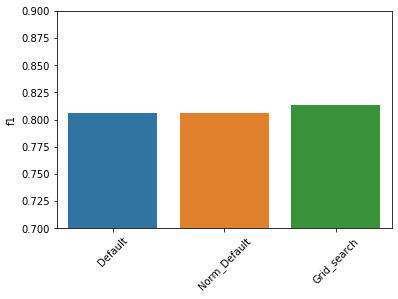

In [61]:
sns.barplot(x=f1_df.columns, y=f1_df.loc['f1'])
plt.xticks(rotation=45)
plt.ylim((0.7,0.9))
plt.show()

## 20. ทำ Visualization ของค่า Recall ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization

In [62]:
model = ['Default', 'Norm_Default', 'Grid_search']
recall_scores = [recall1, recall2, recall3]

# create eval_df dataframe
recall_df = pd.DataFrame(np.array([recall_scores]),columns=model, index=['recall'])
recall_df

,Default,Norm_Default,Grid_search
recall,0.791667,0.791667,0.81295


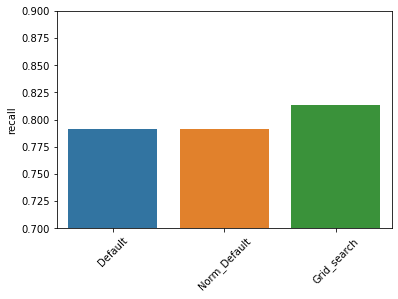

In [63]:
sns.barplot(x=recall_df.columns, y=recall_df.loc['recall'])
plt.xticks(rotation=45)
plt.ylim((0.7,0.9))
plt.show()

## 21. ทำ Visualization ของค่า Accuracy ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization

In [64]:
model = ['Default', 'Norm_Default', 'Grid_search']
accuracy_scores = [acc1, acc2, acc3]

# create eval_df dataframe
accuracy_df = pd.DataFrame(np.array([accuracy_scores]),columns=model, index=['accuracy'])
accuracy_df

,Default,Norm_Default,Grid_search
accuracy,0.725,0.725,0.74


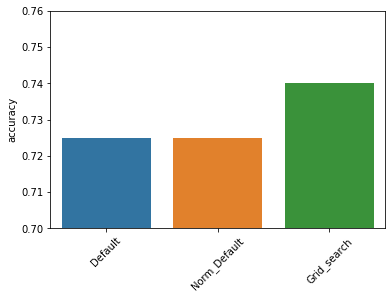

In [65]:
sns.barplot(x=accuracy_df.columns, y=accuracy_df.loc['accuracy'])
plt.xticks(rotation=45)
plt.ylim((0.7,0.76))
plt.show()

## 22. สามารถใช้เทคนิคใดก็ได้ตามที่สอนมา ใช้ Decision Tree Algorithm แล้วให้ผลลัพธ์ที่ดีที่สุดที่เป็นไปได้ (อาจจะรวม Grid Search กับ Normalization/Standardization ?)

In [66]:
features

['Credit amount',
 'Duration',
 'Saving accounts_little',
 'Saving accounts_moderate',
 'Saving accounts_quite rich',
 'Saving accounts_rich',
 'Checking account_little',
 'Checking account_moderate',
 'Checking account_rich']

In [67]:
# ทำ Normalization + Grid Search + selected features
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, random_state=123)

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

param_combination = {'max_depth':[4,8,16,32,64,128,256], 'min_samples_leaf':[1,2,4,8,12,16,20]}
grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=100), param_combination, verbose=0)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

y_pred5 = grid_search.predict(X_test)
cm5 = metrics.confusion_matrix(y_test, y_pred5)
acc5 = metrics.accuracy_score(y_test, y_pred5)
f15 = metrics.f1_score(y_test, y_pred5)
precision5 = metrics.precision_score(y_test, y_pred5)
recall5 = metrics.precision_score(y_test, y_pred5)
# print results
print('Confusion Matrix : \n', cm5)
print('Accuracy : ', acc5)
print('F1 score : ', f15)
print('Precision : ', precision5)
print('Recall : ', recall5)

{'max_depth': 4, 'min_samples_leaf': 20}
Confusion Matrix : 
 [[ 30  31]
 [ 15 124]]
Accuracy :  0.77
F1 score :  0.8435374149659864
Precision :  0.8
Recall :  0.8


Note :  
คาดว่าหากมีการเลือก features มากกว่านี้ รวมกับการทำ grid search น่าจะได้ผลลัพธ์ที่ดีขึ้น